## Letter Model with Nouns and Verbs: Mallet

## Resources

In [8]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

## Get Data

In [9]:
# Get it back
with open("20240220_PhD_LtrLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

## LDA Mallet Model

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [3]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [4]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [21]:
# Run model
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=6, id2word=id2word)

Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 4035
total tokens: 115586
<10> LL/token: -9.07212
<20> LL/token: -8.60723
<30> LL/token: -8.43734
<40> LL/token: -8.34285

0	8.33333	work man book law give pay call city government office woman hand find bring mind employment life company head united_state 
1	8.33333	day week hear send feel child time mother write give return letter girl boy critchlow family brother expect visit fear 
2	8.33333	country land year dollar farm acre money people pay place pound buy month sell bring wood house state settlement settle 
3	8.33333	day place time church house town water ship river pass meet people hour person side form morning evening lie fall 
4	8.33333	write letter friend child year send heart feel time receive world kind father husband death give wife copy promise life 
5	8.33333	sister give school room man time work place order speak hand bring meet visit gentleman life wait receive number face 

<50> LL/token: -8.2

<480> LL/token: -8.16294
<490> LL/token: -8.17265

0	8.33333	man country government people law state call year office body find head world power person character war class mind hand 
1	8.33333	day week child send hear feel brother give letter boy time return find girl thing critchlow expect night leave stay 
2	8.33333	country land year dollar work farm pay money acre place bring sell pound buy people month cent kind price farmer 
3	8.33333	time day place church house river water ship side settle settlement lie pass hour set follow arrive receive proceed town 
4	8.33333	write letter friend send time give book feel heart year life work wife family receive read live paper death kind 
5	8.33333	sister give school place time man work room day speak mother visit turn bring door life order call meet money 

<500> LL/token: -8.16959
<510> LL/token: -8.17017
<520> LL/token: -8.16917
<530> LL/token: -8.17542
<540> LL/token: -8.18025

0	8.33333	country man people state government law call head of

<960> LL/token: -8.18144
<970> LL/token: -8.18442
<980> LL/token: -8.1804
<990> LL/token: -8.17275

0	8.33333	people government state law country man time power office call hold body hand give find head year united_state war character 
1	8.33333	day week child feel hear boy give return girl time thing send night critchlow find walk bed stay house morning 
2	8.33333	country land year dollar work money farm acre pay place bring pound buy sell cent price people farmer month business 
3	8.33333	place time day church house river ship settle side water person fall settlement expect road meet land follow pass hour 
4	8.33333	write letter send friend year give heart book feel receive life time work hear wife pay family paper health live 
5	8.33333	sister give school man time place work room day mother visit call speak door turn bring return hand reach life 

<1000> LL/token: -8.17511

Total time: 37 seconds


In [22]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('people', 0.012547174435132088),
   ('government', 0.01132186443170122),
   ('state', 0.010096554428270352),
   ('man', 0.009851492427584178),
   ('law', 0.009704455227172474),
   ('country', 0.008920256824976719),
   ('call', 0.0074498848208596775),
   ('time', 0.006861736019212861),
   ('power', 0.006763711218938391),
   ('office', 0.0064206244179777485)]),
 (1,
  [('day', 0.036842469067533),
   ('week', 0.030621414253127806),
   ('child', 0.028132992327365727),
   ('feel', 0.019147024262113777),
   ('hear', 0.016312988179995852),
   ('give', 0.014861408723301306),
   ('boy', 0.014308426073131956),
   ('return', 0.013202460772793254),
   ('thing', 0.012165618303725721),
   ('girl', 0.011889126978641045)]),
 (2,
  [('country', 0.029248709615752246),
   ('land', 0.023035748422863697),
   ('year', 0.019021219652074175),
   ('dollar', 0.01782641942267253),
   ('work', 0.017300707321735807),
   ('money', 0.014719938826228254),
   ('farm', 0.01342955457847448),
   ('acre', 0.01266

In [23]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.40498423254273946


In [24]:
# Convert results to lda model format for visualization.
MalletLDA6 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA6, corpus, id2word, sort_topics=False, mds='mmds')
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.146127  0.361479       1        1  18.229493
1     -0.100934 -0.354758       2        1  12.158170
2     -0.385932 -0.057202       3        1  17.655604
3     -0.220757  0.264671       4        1  18.182934
4      0.274996 -0.279496       5        1  15.349274
5      0.286500  0.065306       6        1  18.424526, topic_info=        Term         Freq        Total Category  logprob  loglift
245   sister   962.000000   962.000000  Default  30.0000  30.0000
306    write   645.000000   645.000000  Default  29.0000  29.0000
298     week   463.000000   463.000000  Default  28.0000  28.0000
67       day  1115.000000  1115.000000  Default  27.0000  27.0000
594  country   881.000000   881.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
220   return   109.665813   396.114261   Topic6  -5.3426   0.4072
335    bring   108.569155   494.904865   Topic6  -5.3526   0.1745
463    order    96.505915   244.076488   Topic6  -5.4704   0.7636
494   remain    99.795890   314.435976   Topic6  -5.4369   0.5438
162     meet    99.795890   328.698185   Topic6  -5.4369   0.4995

[535 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
755       1  0.162132    account
755       2  0.616100    account
755       4  0.221580    account
1110      3  0.999162       acre
1824      3  0.952439     adjoin
...     ...       ...        ...
307       1  0.139795       year
307       3  0.460112       year
307       4  0.143097       year
307       5  0.257574       year
308       2  0.994531  yesterday

[666 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [30]:
p = pyLDAvis.gensim.prepare(MalletLDA6, corpus, id2word, sort_topics=False, mds='mmds')
pyLDAvis.save_html(p, '20240221_PhD_TopicLtrMAL06.html')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [27]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA6, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.124540  0.305558       1        1  18.229486
1     -0.264756 -0.062088       2        1  12.158168
2      0.248794 -0.258817       3        1  17.655602
3      0.117951 -0.035117       4        1  18.182932
4     -0.208258 -0.078763       5        1  15.349271
5     -0.018271  0.129228       6        1  18.424543, topic_info=        Term         Freq        Total Category  logprob  loglift
245   sister   962.000000   962.000000  Default  30.0000  30.0000
306    write   645.000000   645.000000  Default  29.0000  29.0000
298     week   463.000000   463.000000  Default  28.0000  28.0000
67       day  1115.000000  1115.000000  Default  27.0000  27.0000
594  country   881.000000   881.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
220   return   109.665909   396.114296   Topic6  -5.3426   0.4072
335    bring   108.569250   494.904905   Topic6  -5.3526   0.1745
463    order    96.506000   244.076530   Topic6  -5.4704   0.7636
494   remain    99.795977   314.436028   Topic6  -5.4369   0.5438
162     meet    99.795977   328.698237   Topic6  -5.4369   0.4995

[529 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
755       1  0.162132    account
755       2  0.616100    account
755       4  0.221580    account
958       3  1.039024   accustom
1110      3  0.999162       acre
...     ...       ...        ...
307       1  0.139795       year
307       3  0.460112       year
307       4  0.143097       year
307       5  0.257574       year
308       2  0.994532  yesterday

[660 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

This warning is not serious. See https://www.pythonclear.com/errors/runtimewarning-divide-by-zero-encountered-in-log/ for details.

In [10]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=17, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 4035
total tokens: 115586
<10> LL/token: -8.97238
<20> LL/token: -8.52467
<30> LL/token: -8.346
<40> LL/token: -8.26528

0	10	country people year state place person land government church settle time house man form law city obtain world call settlement 
1	10	work year dollar pay country land farm letter acre money month brother sell give bring kind family pound live buy 
2	10	day water time morning hour bed night ship town week evening leave walk weather pass fall river side board spend 
3	10	sister time give school man place work room order receive visit day return meet speak case bring mother show answer 
4	10	write send feel life child letter friend give hear heart book boy read hand time woman girl father die death 

<50> LL/token: -8.22912
<60> LL/token: -8.21173
<70> LL/token: -8.1907
<80> LL/token: -8.1858
<90> LL/token: -8.16529

0	10	country people year state person place government church land law man

<560> LL/token: -8.14299
<570> LL/token: -8.14566
<580> LL/token: -8.14552
<590> LL/token: -8.14788

0	10	people country year time government church man state law person call form power number place office follow difficulty hand united_state 
1	10	land country year dollar work pay money farm place acre sell pound bring find buy month house give kind family 
2	10	day time morning water house river ship side bed night evening week hour fall critchlow town walk pass board call 
3	10	sister give school time man room place work visit day bring mother speak remain order hand turn reach show return 
4	10	write send letter feel friend child give hear time life book heart boy week wife brother live receive care paper 

<600> LL/token: -8.13768
<610> LL/token: -8.14328
<620> LL/token: -8.14285
<630> LL/token: -8.14479
<640> LL/token: -8.14373

0	10	people year man church time government state country law person call form power office difficulty number follow hold member world 
1	10	country land 

<110> LL/token: -8.16983
<120> LL/token: -8.17095
<130> LL/token: -8.17071
<140> LL/token: -8.16924

0	8.33333	day night water morning time bed ship hour evening week walk pass weather boy board stay town island child call 
1	8.33333	country work land dollar year money pay farm acre bring sell pound find people buy business city cent price month 
2	8.33333	state book law hand call people time power husband man life woman copy heart mind matter year party end hold 
3	8.33333	write letter send feel friend hear child give week brother year time kind critchlow live expect health month return family 
4	8.33333	sister give school time work man room place day mother hand face bring visit life speak show mind turn door 
5	8.33333	place house church time land country settle year person river town road government people arrive settlement family follow number building 

<150> LL/token: -8.16789
<160> LL/token: -8.16359
<170> LL/token: -8.17119
<180> LL/token: -8.17023
<190> LL/token: -8.17144

0	


0	8.33333	day time night morning water ship bed hour evening week pass fall walk leave house island side air passenger call 
1	8.33333	country land work year dollar money farm acre pay bring sell find pound people buy place cent month business price 
2	8.33333	man law hand call time state mind people life country year power world head matter give woman heart character opinion 
3	8.33333	write letter send feel hear friend child give week brother time book critchlow return receive trouble girl wife hope mother 
4	8.33333	sister give school place work room man time day mother speak meet hand visit call show bring send turn door 
5	8.33333	place church year settle house person country time government town receive land family follow number settlement people obtain road remain 

<600> LL/token: -8.17451
<610> LL/token: -8.17943
<620> LL/token: -8.17693
<630> LL/token: -8.1768
<640> LL/token: -8.17558

0	8.33333	day time night morning water ship bed hour evening walk pass week leave island t

<40> LL/token: -8.33376

0	7.14286	country land year dollar pay farm acre money pound sell wood buy kind place price farmer cent bring purchase wheat 
1	7.14286	time return give house meet father rest answer hear expect suffer lose offer point friend life train die publish wear 
2	7.14286	day water river house ship evening place find city family town time board morning fall work set night business island 
3	7.14286	people government state church law man country form person power year office place follow village call united_state obtain time end 
4	7.14286	letter write send friend hear feel brother book year week family give receive health wife paper heart live girl work 
5	7.14286	sister school give place man visit room work turn travel time day show door speak reach remain hand mother order 
6	7.14286	child work day give boy call bring mind week critchlow life feel bed change eye mother woman room fear head 

<50> LL/token: -8.28513
<60> LL/token: -8.25468
<70> LL/token: -8.23526
<80>


0	7.14286	land country year dollar farm acre money work pay find bring pound month sell house buy cent price farmer people 
1	7.14286	time expect hand give mind find friend father end interest receive return day care house meet heart lose change reason 
2	7.14286	day water place time river house ship town fall side hour board leave pass morning road travel proceed island set 
3	7.14286	man people country state government church law year person place form follow call office power obtain preach attend war settle 
4	7.14286	write letter send feel friend give brother hear year book pay family kind health paper husband work leave live receive 
5	7.14286	sister give school man place work mother room visit speak time day turn order show start money send hospital call 
6	7.14286	week child day bring boy work give critchlow night thing feel hear stay bed room make world life fear girl 

<450> LL/token: -8.18176
<460> LL/token: -8.17718
<470> LL/token: -8.18021
<480> LL/token: -8.18176
<490> LL


0	7.14286	country land year dollar money farm acre work pay buy pound month place bring sell cent people price farmer purchase 
1	7.14286	time hand mind find friend call interest return meet answer lose thing end matter change heart case family suffer life 
2	7.14286	day place water time river house ship town road hour side pass fall morning leave evening arrive proceed island passenger 
3	7.14286	people government state church man law country year person form office number settle preach attend war follow call child power 
4	7.14286	write send letter friend hear feel brother give year book receive pay health child live work husband wife kind visit 
5	7.14286	sister give school man place room work mother time day visit speak door show turn bring reach hospital order money 
6	7.14286	week day child feel boy give work hear critchlow night find stay bring return head girl bed thing today world 

<850> LL/token: -8.18567
<860> LL/token: -8.19133
<870> LL/token: -8.18962
<880> LL/token: -8.

<210> LL/token: -8.21228
<220> LL/token: -8.20669
<230> LL/token: -8.20483
<240> LL/token: -8.2068

0	6.25	people law year man state country church government time call office power person war duty religion congregation speak party minister 
1	6.25	year country land acre pay dollar farm money pound time brother letter family month live send sell wheat price crop 
2	6.25	place house land settle town river road arrive person settlement wood labour country obtain travel island difficulty village receive build 
3	6.25	work day bring find people cent business dollar city board foot give water man pay money world month employment house 
4	6.25	child week day hear feel give girl walk visit critchlow return find boy make time room fear expect town table 
5	6.25	sister give time school place man work room mother show door speak bring call reach family hospital turn mind gentleman 
6	6.25	write letter send friend feel give heart book life wife hear paper husband receive read father hand death mo

<610> LL/token: -8.22526
<620> LL/token: -8.2174
<630> LL/token: -8.21766
<640> LL/token: -8.21544

0	6.25	time state man law country call people power government war give child year order religion support office enemy find speak 
1	6.25	country year land acre farm dollar pay money bring pound live buy price sell kind purchase brother family grow wheat 
2	6.25	place house land settle river year church country time number settlement town arrive person road obtain government receive difficulty follow 
3	6.25	work people find day business place give cent city money dollar world bring man state employment board wage mind body 
4	6.25	child week day feel time send return hear critchlow find expect boy thing visit fear stay brother girl give letter 
5	6.25	sister give place man time school work room mother speak visit order door meet life hospital show reach bring day 
6	6.25	write letter friend send give feel book heart life receive read hear wife hand work husband year copy mother family 


Mallet LDA: 9 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 4035
total tokens: 115586
<10> LL/token: -9.20967
<20> LL/token: -8.71409
<30> LL/token: -8.54416
<40> LL/token: -8.45528

0	5.55556	day water town house week land place critchlow farm wood river night bring fall store foot side tree arrive provision 
1	5.55556	country land year church place person government settle settlement produce people road form house number state obtain expense difficulty time 
2	5.55556	give friend life time hand receive child visit family return lose woman order mention night boy feel hear spirit sight 
3	5.55556	letter write send year acre hear feel pay brother kind friend child week dollar give health book live family pound 
4	5.55556	time return child day school heart suffer teach give travel answer learn reason thing nature play service power write wait 
5	5.55556	man call speak give law death die eye head heart door hold father soul enemy understand answer question order judge 
6

<360> LL/token: -8.22324
<370> LL/token: -8.22003
<380> LL/token: -8.22314
<390> LL/token: -8.22941

0	5.55556	country land acre farm pound critchlow wood town week foot bring purchase horse kind wheat store house sell dollar crop 
1	5.55556	place year country church person house family time settle receive number settlement government land follow form road expect town arrive 
2	5.55556	child feel life return fear hand read boy heart change lose care room receive friend speak spirit mind eye trouble 
3	5.55556	write letter send hear give brother week friend year time feel book day health wife kind family expect girl husband 
4	5.55556	people state time child interest give find school idea return mind matter answer government power reason office gentleman thing meet 
5	5.55556	man country law call hand head year order enemy give history bear crime judge nation truth speak woman war heart 
6	5.55556	sister give time school place man work room mother day visit meet bring send show walk doo

<710> LL/token: -8.22793
<720> LL/token: -8.22914
<730> LL/token: -8.22698
<740> LL/token: -8.22597

0	5.55556	land country farm acre dollar pay pound money bring price farmer sell buy purchase wood wheat grow produce crop house 
1	5.55556	year place church time country settle person house settlement number remain road follow family receive form difficulty land expect town 
2	5.55556	child week feel day return boy hear critchlow fear room walk trouble change spirit give visit night find bed baby 
3	5.55556	write letter send friend give hear year time brother family heart book feel receive life month health work husband wife 
4	5.55556	state mind people school child interest find hold return hand government idea matter friend power office party character case nature 
5	5.55556	man time call law country head give enemy woman life history peace crime nation year war lordship heart truth send 
6	5.55556	sister give place time man school work mother room day speak visit bring door hospital 

<60> LL/token: -8.36272
<70> LL/token: -8.32191
<80> LL/token: -8.3119
<90> LL/token: -8.30111

0	5	day water river time morning fall side night pass tree evening hour island foot wind boat lie wood cover carry 
1	5	friend send write heart life wife letter year live husband brother receive book health pay father trouble family woman bear 
2	5	sister work room give day mother place man fear bring receive life send doctor girl baby show time call child 
3	5	time return reach answer order walk case visit hand continue die door eye gentleman question wait remain understand give follow 
4	5	country year people state give produce farmer time land government call expense world make law property man united_state money religion 
5	5	feel letter week write child send hear give day critchlow kind girl time stay friend leave return expect brother weather 
6	5	day ship work board body air passenger find sea require captain mind head call city observe employment food people child 
7	5	land dollar fa

<360> LL/token: -8.25174
<370> LL/token: -8.24996
<380> LL/token: -8.2483
<390> LL/token: -8.25299

0	5	day time river morning fall water town night hour side evening island place wind boat clock pass journey house lie 
1	5	write friend send life book give heart year receive live husband letter feel pay copy wife woman paper read fear 
2	5	sister give work room place man mother day bring show fear time hospital money send start patient train build receive 
3	5	time return call family hand answer meet remain gentleman rest eye order follow visit case begin speak leave wait change 
4	5	state country people year man call money government land time idea property company united_state city office law make pay possess 
5	5	letter child week send hear write feel day brother give critchlow girl time boy expect thing mother trouble stay kind 
6	5	work board find business day bring people ship mind sea water head employment body child world air food week clothe 
7	5	land country dollar year farm 

<660> LL/token: -8.25514
<670> LL/token: -8.2562
<680> LL/token: -8.25344
<690> LL/token: -8.25394

0	5	day water river morning place time fall night town hour pass ship island road side bed wind evening boat clock 
1	5	write send friend letter give book life heart work receive feel husband year hear read health copy wife paper live 
2	5	sister give school place man room mother work visit day hospital speak number turn life show bring patient train start 
3	5	time call family return hand answer mind meet gentleman eye order face leave case remain change table walk town rest 
4	5	people state year government country man united_state pay suppose town idea company office class money land power amount dollar law 
5	5	child week feel day hear letter send time critchlow give boy brother write return girl thing mother expect visit find 
6	5	work day find give bring board business body employment food head week clothe city call money cent world ship air 
7	5	land country year farm dollar acre 

<960> LL/token: -8.2539
<970> LL/token: -8.24903
<980> LL/token: -8.24631
<990> LL/token: -8.24394

0	5	day time water river morning night fall ship hour side town passenger pass bed evening lie call wind boat road 
1	5	write letter send friend give book feel heart life receive husband hear work paper pay wife father year read copy 
2	5	sister give school man room day place mother work visit speak hospital meet continue show reach bring patient train life 
3	5	time family hand return child answer friend eye leave mind face remain change gentleman order rest call case care end 
4	5	state people year country government town united_state land labour office company obtain part pay man employ property possess afford power 
5	5	week child send day feel hear time critchlow letter mother brother boy girl visit expect give trouble stay fear night 
6	5	work day place give find business board bring world employment money water food city house body mind clothe eat call 
7	5	land country year farm 

<260> LL/token: -8.25902
<270> LL/token: -8.26153
<280> LL/token: -8.26154
<290> LL/token: -8.2603

0	4.54545	state year government hold hand power interest people office judge law answer teach follow governor united_state live lead purpose lordship 
1	4.54545	sister give time man work room school place mother visit bring speak hospital day door patient train meet number show 
2	4.54545	country land year dollar farm acre money pay pound bring sell price farmer buy purchase wheat crop produce kind grow 
3	4.54545	work people place give business find day world city man employment board money body wage food mind require life house 
4	4.54545	write feel book heart friend life read husband send copy woman baby death bear forget publish moodie hand girl die 
5	4.54545	letter send hear give write week time brother friend year month family live expect health receive thing feel day paper 
6	4.54545	child return give day remain fear account school time find make enjoy trouble house pleasure hear

<560> LL/token: -8.26448
<570> LL/token: -8.26294
<580> LL/token: -8.26368
<590> LL/token: -8.26215

0	4.54545	state people year hold government return interest time answer judge power school office teach matter hand order question governor united_state 
1	4.54545	sister give room school man time work mother speak visit bring hospital place meet patient day door number turn order 
2	4.54545	country land year farm acre dollar pay money pound bring price farmer sell purchase wheat produce buy crop kind cent 
3	4.54545	work people business man day city find give world employment money body life wage place mind food board dollar child 
4	4.54545	write friend book heart feel life work read husband send copy care bear hand death publish woman moodie pay lose 
5	4.54545	letter send give write hear time brother year friend live family health month receive expect thing leave pay wife mother 
6	4.54545	child week feel day critchlow return fear stay make give account baby girl trouble spend today

<860> LL/token: -8.26303
<870> LL/token: -8.26118
<880> LL/token: -8.26267
<890> LL/token: -8.26524

0	4.54545	state people hold government interest return school office power judge year opinion house question teach end matter lead answer make 
1	4.54545	sister give time room man work school place mother speak visit hospital bring call patient train number order door show 
2	4.54545	country land year farm acre dollar pay pound money sell bring price farmer wheat purchase crop produce cost market month 
3	4.54545	work people find give business world man city employment money day body state wage board food place dollar cent mind 
4	4.54545	feel write book heart friend life work send read husband copy receive woman care pay child mother hand publish moodie 
5	4.54545	letter send give write time hear year friend family brother health live leave month day kind wife thing find hope 
6	4.54545	child week feel critchlow day visit return stay fear baby evening today girl make morning house spir

<110> LL/token: -8.32654
<120> LL/token: -8.32017
<130> LL/token: -8.31158
<140> LL/token: -8.29656

0	4.16667	dollar year pay farm acre money sell country pound bring buy month price live kind work wheat cent land brother 
1	4.16667	order pass day speak begin follow head meet end case stand fall child manner rest continue carry hear religion break 
2	4.16667	law man country government state people call power office year war enemy nation lordship irishman peace woman force parliament judge 
3	4.16667	time friend give family receive return wife bear hope leave letter write mind find answer interest hand health promise suppose 
4	4.16667	sister give school room man mother place time visit day hospital call patient door work reach hand speak train teacher 
5	4.16667	write send book heart read work life feel friend husband care copy year daughter woman letter father fear give pay 
6	4.16667	work find man give money world passenger day business people body mind board food life eat require c

<360> LL/token: -8.26779
<370> LL/token: -8.27412
<380> LL/token: -8.27338
<390> LL/token: -8.27385

0	4.16667	dollar year pay country farm acre bring money sell land buy pound cent price wheat work crop family month kind 
1	4.16667	day meet time stand begin eye continue rest case follow pass die end head hold carry death offer fire station 
2	4.16667	country law man power government call state enemy crime nation people war head live peace force question parliament opinion history 
3	4.16667	letter time give send friend write hear family leave brother receive answer find health live expect remain kind promise wife 
4	4.16667	sister give man school room place mother work visit time hospital call door patient train speak bring reach build teacher 
5	4.16667	write send life book year heart feel friend husband work paper letter copy read hand publish moodie care bear pay 
6	4.16667	work give man day mind life money people body world find food business company drink advice bring ship woman 

<610> LL/token: -8.26817
<620> LL/token: -8.25713
<630> LL/token: -8.2602
<640> LL/token: -8.27065

0	4.16667	dollar year farm land acre country pay money bring sell buy pound price cent work wheat kind crop family farmer 
1	4.16667	time day hand meet eye begin continue speak carry wait reason stand case die hold fall lose rest death head 
2	4.16667	man country law call enemy state crime nation opinion year power head lordship woman question history fortune religion judge war 
3	4.16667	send letter give time write hear friend brother leave family health expect month live kind find remain wife receive answer 
4	4.16667	sister give place school man room mother visit work bring hospital patient order call show turn train reach understand door 
5	4.16667	write book feel heart friend life husband pay send copy paper read work year receive letter give publish moodie bear 
6	4.16667	work give day man business world find mind people life money company body call food person head advice gold mon

<860> LL/token: -8.27485
<870> LL/token: -8.27597
<880> LL/token: -8.27756
<890> LL/token: -8.28087

0	4.16667	year land country farm acre dollar pay money bring buy pound sell price wheat crop grow cost cent house work 
1	4.16667	time day hand meet eye continue mind begin stand rest hear death die reason prepare head hold follow find break 
2	4.16667	law country man call enemy history power crime nation speak lordship question state head life war fortune language manner judge 
3	4.16667	letter send give write time hear friend family brother health leave live expect month thing year hope receive mother return 
4	4.16667	sister give school place room man mother work visit speak hospital reach patient train order bring door show number call 
5	4.16667	write feel book send friend heart life work husband pay copy read care daughter give child publish moodie bear receive 
6	4.16667	work man give day people body life money world time food call child company head business find eat air case 
7

<110> LL/token: -8.3381
<120> LL/token: -8.32576
<130> LL/token: -8.32215
<140> LL/token: -8.31332

0	3.84615	work country bring dollar farm pay money cent purchase grow board find business cut water buy wood horse farmer people 
1	3.84615	letter write send hear feel give time friend mother thing death receive day pay hope expect forget die moodie love 
2	3.84615	sister school give mother speak meet order reach train build remain wait teacher hand face remark understand mind continue begin 
3	3.84615	day morning time evening night bed leave store snow clock hour rest weather sleep foot lie spend arrive enjoy board 
4	3.84615	land place house river town road day settle person village employment city travel fall bank inhabitant emigrant situation afford lake 
5	3.84615	man law call country speak enemy war hand time order power crime nation head reason language history parliament burn fall 
6	3.84615	child week feel critchlow boy find fear trouble change brother visit today return stay ca

<360> LL/token: -8.30003
<370> LL/token: -8.29157
<380> LL/token: -8.29714
<390> LL/token: -8.29112

0	3.84615	work dollar bring day pay cent money find give business board employment wage buy sell cost people trade city week 
1	3.84615	letter send write give hear feel friend time kind mother thing father day month girl expect death die forget receive 
2	3.84615	sister give school mother speak meet train reach wait teacher remark man build mind hand woman order understand begin gentleman 
3	3.84615	day morning night bed time evening call weather leave clock walk wind rest snow sleep lie fire hour spend side 
4	3.84615	place land house river town road building wood travel fall bank emigrant settle village lake inhabitant afford distance settler employ 
5	3.84615	country man call head law time enemy hand crime nation order speak war fall power irishman lordship peace history force 
6	3.84615	child week feel critchlow boy brother stay make house fear visit today day mail yesterday find ac

<610> LL/token: -8.28222
<620> LL/token: -8.28981
<630> LL/token: -8.29145
<640> LL/token: -8.29529

0	3.84615	work bring dollar pay day find give cent buy employment money board wage month business people sell city week advise 
1	3.84615	letter send write hear give friend time feel kind child mother thing girl health wife father daughter day expect die 
2	3.84615	sister give school mother work man hospital speak train return meet receive teacher begin reach life stage family build remark 
3	3.84615	day morning night leave evening bed hour walk wind snow clock rest weather time reach set call lie fall rain 
4	3.84615	place land house river town road wood bank village water travel side emigrant building settler lake settlement afford lay journey 
5	3.84615	call time law man country enemy head hand crime nation wife give speak peace war order history seek manner honor 
6	3.84615	week child feel critchlow boy stay visit make account today town return brother fear yesterday baby school hou

<860> LL/token: -8.29515
<870> LL/token: -8.28553
<880> LL/token: -8.28037
<890> LL/token: -8.2944

0	3.84615	work bring dollar day business pay find cent money place give city wage month employment board people trade buy week 
1	3.84615	letter send write give hear time friend child feel mother kind girl wife health thing leave month father brother family 
2	3.84615	sister give school work man mother speak hospital train reach mind order return teacher question begin build life family understand 
3	3.84615	day morning night bed time walk rest evening hour wind snow clock fall weather leave water expect boat cross call 
4	3.84615	land country place town river house settle wood village road emigrant settler building settlement water lake bank afford side farm 
5	3.84615	country man law time call enemy crime nation lordship head view order give speak war answer peace history hand force 
6	3.84615	week child critchlow day feel stay boy account fear make today school dinner trouble mail spi

<110> LL/token: -8.35298
<120> LL/token: -8.3515
<130> LL/token: -8.34519
<140> LL/token: -8.34324

0	3.57143	time people day child order give person manner place speak request service observe offer support religion school town call begin 
1	3.57143	room walk return place call remain house door hour travel stand clock face reach table fear family day train order 
2	3.57143	land country acre farm river wood water bring buy produce foot tree farmer house lake price horse pound fall cost 
3	3.57143	day week bed evening child night morning spend time snow feel fall rain commence fire find bank store boy doctor 
4	3.57143	year pay dollar brother letter sell family month money live send health kind week house pound wheat make bushel give 
5	3.57143	sister school man mother visit give speak hospital number teacher patient bring case meet remark show question understand pupil fact 
6	3.57143	send critchlow return mother trouble copy respect account hope today time publish feel enjoy suppose st

<360> LL/token: -8.3014
<370> LL/token: -8.30414
<380> LL/token: -8.30445
<390> LL/token: -8.30743

0	3.57143	time people child day give manner receive place order school person request town speak conduct rest state service follow party 
1	3.57143	return room walk place day hear door house remain table travel hour fear stand town clock journey foot carry gentleman 
2	3.57143	land country acre farm wood river buy produce house foot farmer bring sell price purchase place wheat lake tree water 
3	3.57143	week day child bed critchlow evening morning weather night boy stay snow feel find time today island yesterday visit store 
4	3.57143	year pay family brother letter dollar money send country month live friend give health hear bring kind write pound expect 
5	3.57143	sister school give man mother visit speak hospital patient room bring receive continue number remark follow fact understand question girl 
6	3.57143	send book feel work trouble copy return interest leave paper fear publish mai

<610> LL/token: -8.31192
<620> LL/token: -8.31286
<630> LL/token: -8.30654
<640> LL/token: -8.30162

0	3.57143	time people give child person day order manner call request find conduct receive state speak service rest character gentleman stand 
1	3.57143	place day walk town house travel call return room hour leave remain reach road door journey morning horse family gentleman 
2	3.57143	land country acre farm wood sell wheat farmer price pound produce lake purchase tree settle crop bushel horse market cut 
3	3.57143	week child day critchlow boy feel stay night today evening make yesterday spend hear trouble visit time school fear brother 
4	3.57143	year pay send letter family dollar brother month live money bring hear health give friend buy country kind find pound 
5	3.57143	sister school give man room mother visit hospital speak number patient continue meet teacher fear understand pupil attend question begin 
6	3.57143	book write work send paper copy feel receive read interest year frie


0	3.57143	time child people give day case person order manner request state situation call conduct service find party gentleman teach stand 
1	3.57143	day place walk house town return travel road remain call time horse reach hour rest foot fall side morning table 
2	3.57143	land country acre farm dollar wood price pound sell wheat farmer crop purchase produce lake tree market house bushel grow 
3	3.57143	week child critchlow day feel boy stay evening night today store make hear yesterday morning fear visit school account commence 
4	3.57143	year letter send family brother month live friend pay health find give money country hear write remain time kind leave 
5	3.57143	sister school man room mother give visit speak hospital patient number meet order understand continue bring remark teacher fear pupil 
6	3.57143	book write send work receive feel copy paper sell interest read publish friend story spirit leave term draw pleasure husband 
7	3.57143	people state dollar year city world work 

<40> LL/token: -8.51257

0	3.33333	day ship weather night air passenger time leave sea snow hour captain vessel bed horse train sail food evening morning 
1	3.33333	church people person child time place preach member account congregation meet religion settle minister number year school request duty support 
2	3.33333	send write friend letter give work husband hear paper book wife mother pay death heart daughter publish year health kind 
3	3.33333	man school call turn order room head begin number fact speak teacher question bring continue service understand teach stage judge 
4	3.33333	feel child week hear letter girl write send critchlow fear day boy friend trouble brother thing expect give baby visit 
5	3.33333	day river house place town rest pass island proceed return inhabitant distance lie water morning village bank time clock order 
6	3.33333	law time government hand end office give hold power history call truth crime pray find arm enemy mind nation force 
7	3.33333	work business 

<210> LL/token: -8.30223
<220> LL/token: -8.30087
<230> LL/token: -8.30062
<240> LL/token: -8.31022

0	3.33333	day water ship morning night passenger time wind sea pass captain evening hour vessel snow sail bed lie weather provision 
1	3.33333	church people person place year time government settle number follow form preach state settlement duty member congregation united_state child minister 
2	3.33333	write send letter friend give work book husband mother copy paper time receive hear kind pay death wife father daughter 
3	3.33333	school man turn speak order fact bring call continue wait number understand begin teacher judge day teach stage face gentleman 
4	3.33333	child week feel critchlow boy day stay hear return baby girl today evening visit trouble morning send yesterday thing fear 
5	3.33333	place house river town day travel fall wood side village return bank island proceed land lake horse journey water inhabitant 
6	3.33333	law man country call enemy crime nation state war head 

<410> LL/token: -8.29416
<420> LL/token: -8.30072
<430> LL/token: -8.29923
<440> LL/token: -8.30292

0	3.33333	day ship morning time hour passenger water wind sea evening bed captain night sail pass leave provision air vessel weather 
1	3.33333	church government people year state person place number settlement form preach attend follow house member duty settle congregation minister meet 
2	3.33333	write send letter give work book paper copy receive daughter friend hear husband moodie love read mother flower kind promise 
3	3.33333	school man bring fact begin day number teacher turn gentleman call judge interest teach stage continue service lady table girl 
4	3.33333	child week feel critchlow return boy visit stay send baby today evening trouble fear morning yesterday weather make day expect 
5	3.33333	place house river town road water land fall travel side wood bank day lake journey build inhabitant distance island village 
6	3.33333	man call law country head enemy state crime nation t

<610> LL/token: -8.30194
<620> LL/token: -8.30809
<630> LL/token: -8.30706
<640> LL/token: -8.30486

0	3.33333	day ship water morning passenger evening wind sea bed leave time hour captain night sail air pass vessel lie provision 
1	3.33333	church government people year place follow form number settle state preach time settlement attend member duty person congregation house minister 
2	3.33333	write send letter feel give work book mother paper copy girl hear death read husband friend daughter moodie father love 
3	3.33333	school teach call bring number begin teacher fact day table girl stage gentleman interest town lady prepare pupil turn open 
4	3.33333	week child critchlow boy feel return send give stay visit morning day baby today make fear yesterday evening trouble spirit 
5	3.33333	place town river house road day land fall water side wood travel call lake reach inhabitant journey village bank proceed 
6	3.33333	man law country call enemy time crime nation state speak head favor wa

<810> LL/token: -8.30735
<820> LL/token: -8.31029
<830> LL/token: -8.30646
<840> LL/token: -8.30169

0	3.33333	time day ship morning passenger sea wind pass captain evening leave water sail vessel bed night lie hour provision board 
1	3.33333	church government year people form follow settlement preach settle house number place person time congregation attend minister member duty day 
2	3.33333	write send letter book give feel read copy work mother paper girl husband daughter publish moodie bear flower father pay 
3	3.33333	school call fact teach begin girl number teacher turn day eye interest gentleman lady continue service table pupil meet stage 
4	3.33333	week child critchlow visit feel stay boy return fear today morning day make evening trouble yesterday give town expect baby 
5	3.33333	place river house road land town water side travel wood fall bank village lake call journey inhabitant distance employ return 
6	3.33333	man law country call enemy head crime nation war speak force t

Mallet LDA: 16 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 4035
total tokens: 115586
<10> LL/token: -9.41782
<20> LL/token: -8.83932
<30> LL/token: -8.63547
<40> LL/token: -8.53221

0	3.125	time fall horse island river bank road ground half lie set weather foot account side town distance tree snow reach 
1	3.125	sister room man show door reach begin walk call life patient train meet day sight pass time face prepare minute 
2	3.125	ship water hour morning day air passenger wind night captain side vessel evening leave boat provision sea bed time board 
3	3.125	feel child send critchlow hear fear mother trouble letter visit stay baby father today kind mail enjoy yesterday night flower 
4	3.125	day time expect house place return week receive find make evening request remain spirit manner situation call letter give arrive 
5	3.125	sister give school place time mother visit hospital girl teacher money family case start return notice companion interest pupil remain 
6	3.125

<210> LL/token: -8.33502
<220> LL/token: -8.32733
<230> LL/token: -8.32365
<240> LL/token: -8.3269

0	3.125	day fall river water tree road island foot snow place side walk set weather bank call horse meet cover wood 
1	3.125	room man place mind day door hand show reach turn begin patient train stand wait town life order face bring 
2	3.125	ship time hour day morning passenger leave wind sea water bed night pass captain air vessel sail evening board food 
3	3.125	child critchlow visit stay baby feel kind today make send yesterday boy school morning evening store fear davy commence room 
4	3.125	time expect remain day call feel week return receive month give hear house find spirit arrive spend manner pleasure trust 
5	3.125	sister give school work visit mother hospital money understand time speak family teacher call start pupil build fear remain native 
6	3.125	write book heart life husband copy work read bear year paper publish moodie end wife send truth receive prove story 
7	3.125	let

<410> LL/token: -8.30757
<420> LL/token: -8.31366
<430> LL/token: -8.31228
<440> LL/token: -8.30803

0	3.125	day fall road river tree foot walk place snow wood reach travel island rest horse call side cross bank water 
1	3.125	room place door life bring hand walk mind day wait order face patient continue train speak show case stage gentleman 
2	3.125	ship time day water morning pass hour passenger wind sea night captain bed vessel sail leave stand provision evening carry 
3	3.125	week child critchlow boy town stay today evening morning yesterday make send commence day feel davy cut dinner visit school 
4	3.125	time expect find return feel remain month day house call hear receive fear change friend spend table spirit intend give 
5	3.125	sister give school work man mother time hospital visit meet start family build call teacher pupil understand girl speak native 
6	3.125	write book work life send husband copy read heart paper bear publish moodie year hand receive end term draw story 
7	

<610> LL/token: -8.31635
<620> LL/token: -8.32233
<630> LL/token: -8.31967
<640> LL/token: -8.3234

0	3.125	fall day river side road place snow water house wood travel land horse walk tree rest island journey cross weather 
1	3.125	room place mind door hand speak table life bring case show turn patient hospital eye gentleman walk train companion order 
2	3.125	ship day time morning passenger water hour night sea wind bed pass captain leave sail evening provision bring vessel board 
3	3.125	week critchlow child day morning stay boy today evening make yesterday visit school town store fear davy tea commence mail 
4	3.125	expect time return feel find friend change hear month fear remain call enjoy give account pleasure arrive spend prospect thing 
5	3.125	sister give school work man time mother day visit remain understand number build start family pupil remark teacher native reach 
6	3.125	write book work life send husband copy read letter paper hand year heart publish moodie pay receive 

<810> LL/token: -8.31379
<820> LL/token: -8.32716
<830> LL/token: -8.3257
<840> LL/token: -8.32648

0	3.125	day fall side river place water wood road house travel foot tree horse walk snow bank meet cross ground night 
1	3.125	room place hand day door bring hospital mind face walk wait patient stand train show case life receive companion gentleman 
2	3.125	day ship hour passenger morning bed wind sea board water captain sail lie pass time provision night evening air vessel 
3	3.125	week critchlow child day boy stay today morning visit evening make town spirit yesterday store fear commence school davy tea 
4	3.125	time expect feel call give change find month return friend enjoy thing pleasure hear account leave fear remain prospect intend 
5	3.125	sister give school man work time mother visit order speak reach begin build number meet start teacher pupil remark money 
6	3.125	book work write send pay copy paper letter hand read year husband life publish draw receive sell friend story hea

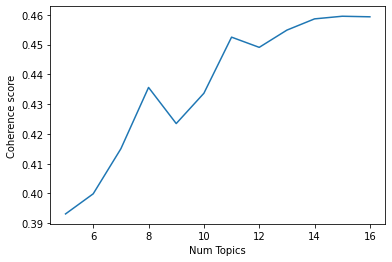

In [12]:
# Show graph
limit=17; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDALtr-Coherence')
plt.show()

In [13]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3931
Num Topics = 6 Coherence:  0.3999
Num Topics = 7 Coherence:  0.415
Num Topics = 8 Coherence:  0.4356
Num Topics = 9 Coherence:  0.4235
Num Topics = 10 Coherence:  0.4337
Num Topics = 11 Coherence:  0.4525
Num Topics = 12 Coherence:  0.4491
Num Topics = 13 Coherence:  0.4549
Num Topics = 14 Coherence:  0.4587
Num Topics = 15 Coherence:  0.4595
Num Topics = 16 Coherence:  0.4594


In [31]:
# Coherence for 14-topic model
print(coherence_values[9])

# Topics for 14-topic model
malletModel_14 = model_list[9]
model_topics_14 = malletModel_14.show_topics(formatted=False)
pprint(sorted(malletModel_14.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA14 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_14)

# Visualize the topics
pyLDAvis.enable_notebook()
vis14 = pyLDAvis.gensim.prepare(MalletLDA14, corpus, id2word, sort_topics=False, mds='mmds')
vis14

0.4586571252434734
[(0,
  '0.032*"time" + 0.020*"people" + 0.017*"day" + 0.016*"give" + 0.016*"person" '
  '+ 0.014*"manner" + 0.014*"order" + 0.014*"case" + 0.014*"return" + '
  '0.014*"child"'),
 (1,
  '0.039*"place" + 0.026*"town" + 0.024*"day" + 0.023*"walk" + 0.020*"house" + '
  '0.016*"travel" + 0.015*"remain" + 0.015*"return" + 0.015*"reach" + '
  '0.015*"call"'),
 (2,
  '0.052*"land" + 0.046*"country" + 0.027*"acre" + 0.027*"farm" + '
  '0.017*"dollar" + 0.014*"farmer" + 0.014*"sell" + 0.014*"pound" + '
  '0.014*"wood" + 0.013*"price"'),
 (3,
  '0.048*"week" + 0.036*"child" + 0.029*"day" + 0.028*"critchlow" + '
  '0.019*"stay" + 0.019*"evening" + 0.018*"feel" + 0.015*"today" + 0.014*"boy" '
  '+ 0.014*"morning"'),
 (4,
  '0.065*"year" + 0.044*"letter" + 0.036*"send" + 0.033*"family" + '
  '0.032*"brother" + 0.030*"live" + 0.025*"hear" + 0.021*"money" + '
  '0.021*"friend" + 0.021*"write"'),
 (5,
  '0.088*"sister" + 0.018*"school" + 0.015*"man" + 0.014*"room" + '
  '0.012*"visit

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.100674 -0.192633       1        1  8.015229
1     -0.245256  0.369981       2        1  7.313394
2     -0.015345  0.440172       3        1  8.002037
3     -0.447598  0.162037       4        1  4.581280
4      0.078083  0.128477       5        1  5.727522
5      0.448039  0.131464       6        1  8.763965
6     -0.256474  0.080627       7        1  6.066409
7      0.141765 -0.436820       8        1  7.680571
8      0.227448  0.400458       9        1  7.405388
9     -0.106781 -0.405355      10        1  8.288790
10    -0.261647 -0.142668      11        1  6.905322
11     0.287726  0.006482      12        1  6.497710
12     0.418864 -0.252495      13        1  7.176931
13    -0.369497 -0.289726      14        1  7.575453, topic_info=       Term         Freq        Total Category  logprob  loglift
245  sister   959.000000   959.000000  Default  30.0000  30.0000
305    work   810.000000   810.000000  Default  29.0000  29.0000
307    year   913.000000   913.000000  Default  28.0000  28.0000
149    land   662.000000   662.000000  Default  27.0000  27.0000
67      day  1123.000000  1123.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
335   bring    90.952023   499.558883  Topic14  -4.6409   0.8769
619  family    83.281370   449.294109  Topic14  -4.7290   0.8948
381     end    64.652643   182.520922  Topic14  -4.9822   1.5424
162    meet    66.844258   328.736166  Topic14  -4.9489   0.9874
7    answer    58.077798   182.125040  Topic14  -5.0895   1.4373

[1203 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  1.004327          abide
2756      3  1.001555      abundance
309       2  1.004258       accident
4473     10  0.987513  accommodation
957      11  0.994917     accomplish
...     ...       ...            ...
1268     11  0.992285          yield
6505      5  1.052583           youe
2447     13  0.035050          youth
2447     14  0.946347          youth
1407     11  0.923851       yuletide

[1717 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA14, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.062967  0.085848       1        1  8.015230
1      0.074810  0.221227       2        1  7.313404
2      0.235791 -0.059360       3        1  8.002036
3     -0.120335  0.181243       4        1  4.581272
4     -0.132606 -0.177350       5        1  5.727545
5     -0.026979  0.036361       6        1  8.763960
6     -0.118877 -0.157159       7        1  6.066405
7      0.149012 -0.188342       8        1  7.680577
8      0.057770  0.272237       9        1  7.405399
9      0.238986 -0.040543      10        1  8.288770
10    -0.026596  0.005899      11        1  6.905303
11    -0.258262 -0.043968      12        1  6.497723
12     0.141475 -0.089884      13        1  7.176928
13    -0.151224 -0.046210      14        1  7.575448, topic_info=       Term         Freq        Total Category  logprob  loglift
245  sister   959.000000   959.000000  Default  30.0000  30.0000
305    work   810.000000   810.000000  Default  29.0000  29.0000
307    year   913.000000   913.000000  Default  28.0000  28.0000
149    land   662.000000   662.000000  Default  27.0000  27.0000
67      day  1123.000000  1123.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
335   bring    90.951962   499.559028  Topic14  -4.6409   0.8769
619  family    83.281315   449.294862  Topic14  -4.7290   0.8948
381     end    64.652599   182.520695  Topic14  -4.9822   1.5424
162    meet    66.844213   328.736152  Topic14  -4.9489   0.9874
7    answer    58.077759   182.125191  Topic14  -5.0895   1.4373

[1182 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  1.004326          abide
2756      3  1.001555      abundance
309       2  1.004256       accident
4473     10  0.987515  accommodation
957      11  0.994920     accomplish
...     ...       ...            ...
1268     11  0.992287          yield
6505      5  1.052578           youe
2447     13  0.035050          youth
2447     14  0.946347          youth
1407     11  0.923854       yuletide

[1696 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [17]:
# Coherence for 15-topic model
print(coherence_values[10])

# Topics for 15-topic model
malletModel_15 = model_list[10]
model_topics_15 = malletModel_15.show_topics(formatted=False)
pprint(sorted(malletModel_15.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA15 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_15)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA15, corpus, id2word, sort_topics=False, mds='mmds')
vis

0.4595404352192557
[(0,
  '0.025*"day" + 0.025*"time" + 0.023*"ship" + 0.020*"morning" + 0.017*"night" '
  '+ 0.017*"passenger" + 0.017*"water" + 0.016*"wind" + 0.016*"sea" + '
  '0.016*"hour"'),
 (1,
  '0.026*"church" + 0.019*"year" + 0.019*"government" + 0.016*"place" + '
  '0.016*"people" + 0.013*"person" + 0.013*"house" + 0.013*"settle" + '
  '0.012*"form" + 0.012*"follow"'),
 (2,
  '0.054*"write" + 0.034*"send" + 0.027*"letter" + 0.027*"book" + 0.018*"work" '
  '+ 0.016*"feel" + 0.015*"girl" + 0.015*"copy" + 0.015*"read" + 0.015*"give"'),
 (3,
  '0.043*"school" + 0.016*"call" + 0.014*"bring" + 0.013*"teach" + '
  '0.012*"number" + 0.011*"begin" + 0.011*"teacher" + 0.010*"fact" + '
  '0.010*"turn" + 0.010*"girl"'),
 (4,
  '0.060*"child" + 0.058*"week" + 0.029*"feel" + 0.028*"critchlow" + '
  '0.025*"boy" + 0.022*"visit" + 0.019*"return" + 0.018*"stay" + 0.015*"today" '
  '+ 0.013*"evening"'),
 (5,
  '0.042*"place" + 0.026*"river" + 0.024*"town" + 0.021*"house" + 0.021*"road" '
  '+

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.418002 -0.119015       1        1  5.928080
1      0.126158 -0.086363       2        1  7.609942
2     -0.420668  0.097759       3        1  6.107788
3      0.335547 -0.271056       4        1  6.753842
4      0.463382 -0.088147       5        1  4.523946
5      0.388075  0.149606       6        1  7.093814
6      0.286889  0.366146       7        1  7.040596
7      0.138929 -0.401821       8        1  7.413042
8     -0.298657 -0.344736       9        1  6.909358
9     -0.170880 -0.108479      10        1  5.603823
10    -0.176494  0.304934      11        1  5.917715
11    -0.327317  0.375381      12        1  7.289967
12     0.062936  0.146049      13        1  6.452971
13    -0.050137 -0.441464      14        1  7.002365
14     0.060240  0.421206      15        1  8.352751, topic_info=        Term        Freq       Total Category  logprob  loglift
245   sister  950.000000  950.000000  Default  30.0000  30.0000
594  country  871.000000  871.000000  Default  29.0000  29.0000
306    write  632.000000  632.000000  Default  28.0000  28.0000
152   letter  630.000000  630.000000  Default  27.0000  27.0000
149     land  669.000000  669.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
121     hand   70.342182  361.216909  Topic15  -4.9955   0.8465
391   follow   60.602496  232.682263  Topic15  -5.1446   1.1372
153     life   62.766870  372.109358  Topic15  -5.1095   0.7028
225     room   60.602496  297.462637  Topic15  -5.1446   0.8916
7     answer   58.438121  179.617164  Topic15  -5.1810   1.3597

[1287 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3091     12  1.005844      abound
3884      9  0.988585     absence
2756     12  1.000508   abundance
309      13  0.986238    accident
957       4  1.009762  accomplish
...     ...       ...         ...
308       5  0.867932   yesterday
308      13  0.133528   yesterday
1268      8  1.008475       yield
2447     14  0.992500       youth
1407      2  0.923852    yuletide

[1824 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [18]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA15, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.196506  0.134391       1        1  5.928067
1     -0.080393 -0.131484       2        1  7.609942
2      0.290216  0.036978       3        1  6.107790
3     -0.113284  0.047059       4        1  6.753838
4      0.002319  0.258211       5        1  4.523955
5     -0.154808  0.022247       6        1  7.093818
6     -0.069747 -0.123018       7        1  7.040599
7      0.080472 -0.136211       8        1  7.413043
8      0.062452 -0.121958       9        1  6.909363
9      0.218423  0.021882      10        1  5.603815
10    -0.095746  0.011314      11        1  5.917722
11    -0.093559 -0.265274      12        1  7.289959
12    -0.100856  0.161223      13        1  6.452967
13     0.127756  0.131922      14        1  7.002369
14     0.123262 -0.047283      15        1  8.352752, topic_info=        Term        Freq       Total Category  logprob  loglift
245   sister  950.000000  950.000000  Default  30.0000  30.0000
594  country  871.000000  871.000000  Default  29.0000  29.0000
306    write  632.000000  632.000000  Default  28.0000  28.0000
152   letter  630.000000  630.000000  Default  27.0000  27.0000
149     land  669.000000  669.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
121     hand   70.342191  361.217026  Topic15  -4.9955   0.8465
391   follow   60.602503  232.682208  Topic15  -5.1446   1.1372
153     life   62.766878  372.109444  Topic15  -5.1095   0.7028
225     room   60.602503  297.462536  Topic15  -5.1446   0.8916
7     answer   58.438128  179.617163  Topic15  -5.1810   1.3597

[1293 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3091     12  1.005845      abound
3884      9  0.988584     absence
2756     12  1.000509   abundance
309      13  0.986239    accident
957       4  1.009763  accomplish
...     ...       ...         ...
308       5  0.867930   yesterday
308      13  0.133528   yesterday
1268      8  1.008475       yield
2447     14  0.992499       youth
1407      2  0.923852    yuletide

[1830 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

In [19]:
# Coherence for 16-topic model
print(coherence_values[11])

# Topics for 16-topic model
malletModel_16 = model_list[11]
model_topics_16 = malletModel_16.show_topics(formatted=False)
pprint(sorted(malletModel_16.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA16 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_16)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA16, corpus, id2word, sort_topics=False, mds='mmds')
vis

0.45935229138380973
[(0,
  '0.027*"day" + 0.023*"place" + 0.022*"fall" + 0.021*"house" + 0.020*"river" '
  '+ 0.019*"side" + 0.018*"road" + 0.015*"walk" + 0.015*"tree" + '
  '0.014*"horse"'),
 (1,
  '0.026*"room" + 0.024*"sister" + 0.021*"place" + 0.015*"day" + 0.014*"mind" '
  '+ 0.014*"bring" + 0.014*"door" + 0.013*"hand" + 0.012*"turn" + '
  '0.011*"hospital"'),
 (2,
  '0.028*"ship" + 0.024*"time" + 0.023*"day" + 0.022*"hour" + 0.021*"water" + '
  '0.017*"passenger" + 0.016*"morning" + 0.015*"wind" + 0.015*"sea" + '
  '0.015*"bed"'),
 (3,
  '0.053*"week" + 0.038*"child" + 0.032*"critchlow" + 0.029*"day" + '
  '0.021*"boy" + 0.018*"make" + 0.017*"today" + 0.016*"morning" + '
  '0.015*"yesterday" + 0.015*"stay"'),
 (4,
  '0.051*"time" + 0.040*"expect" + 0.035*"find" + 0.031*"feel" + '
  '0.026*"change" + 0.022*"month" + 0.022*"call" + 0.021*"enjoy" + '
  '0.020*"give" + 0.018*"hear"'),
 (5,
  '0.081*"sister" + 0.025*"give" + 0.020*"man" + 0.019*"school" + '
  '0.016*"mother" + 0.016*"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.168805 -0.437794       1        1  6.283245
1      0.299360 -0.311783       2        1  7.296138
2     -0.062921 -0.311338       3        1  6.023011
3      0.165351  0.434974       4        1  3.962705
4     -0.438643 -0.054463       5        1  5.621581
5     -0.185168  0.066777       6        1  7.417544
6     -0.255902  0.368836       7        1  5.821079
7     -0.079327  0.410770       8        1  5.076431
8      0.133251 -0.440005       9        1  6.658823
9      0.371916 -0.123094      10        1  6.396080
10     0.083757  0.217968      11        1  6.102195
11     0.402331  0.263229      12        1  6.591336
12     0.080685 -0.076897      13        1  6.311327
13     0.432469  0.060434      14        1  7.342437
14    -0.438098  0.167599      15        1  6.498445
15    -0.340256 -0.235214      16        1  6.597622, topic_info=       Term        Freq       Total Category  logprob  loglift
245  sister  961.000000  961.000000  Default  30.0000  30.0000
152  letter  636.000000  636.000000  Default  29.0000  29.0000
234    send  683.000000  683.000000  Default  28.0000  28.0000
149    land  665.000000  665.000000  Default  27.0000  27.0000
305    work  809.000000  809.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
38    child   62.599075  595.750690  Topic16  -4.8763   0.4654
162    meet   53.656350  330.568279  Topic16  -5.0304   0.9002
160  matter   45.831465  124.803399  Topic16  -5.1881   1.7167
305    work   57.009872  809.623595  Topic16  -4.9698   0.0651
340    call   50.302828  476.339633  Topic16  -5.0950   0.4704

[1362 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3884      5  0.998437        absence
2756     12  1.003631      abundance
3977     15  1.004479          abuse
4473     13  1.000516  accommodation
1         2  0.673358      accompany
...     ...       ...            ...
307      14  0.115920           year
307      16  0.107088           year
308       4  0.981536      yesterday
308      12  0.013446      yesterday
6505      8  0.942279           youe

[1933 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

In [20]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA16, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.211505  0.129195       1        1  6.283257
1     -0.064572  0.132051       2        1  7.296138
2     -0.155826  0.158317       3        1  6.023009
3      0.028919  0.227804       4        1  3.962704
4      0.147357  0.102865       5        1  5.621578
5      0.011058  0.008805       6        1  7.417553
6      0.231152 -0.149175       7        1  5.821089
7      0.266592 -0.029994       8        1  5.076422
8     -0.034228 -0.112443       9        1  6.658820
9     -0.055862 -0.008873      10        1  6.396065
10     0.216751  0.124168      11        1  6.102203
11    -0.115182 -0.250807      12        1  6.591344
12    -0.074537  0.021462      13        1  6.311324
13    -0.120628 -0.188921      14        1  7.342431
14    -0.076464 -0.011614      15        1  6.498443
15     0.006975 -0.152838      16        1  6.597619, topic_info=       Term        Freq       Total Category  logprob  loglift
245  sister  961.000000  961.000000  Default  30.0000  30.0000
152  letter  636.000000  636.000000  Default  29.0000  29.0000
234    send  683.000000  683.000000  Default  28.0000  28.0000
149    land  665.000000  665.000000  Default  27.0000  27.0000
305    work  809.000000  809.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
38    child   62.599044  595.750824  Topic16  -4.8763   0.4654
162    meet   53.656324  330.568433  Topic16  -5.0304   0.9002
160  matter   45.831443  124.803412  Topic16  -5.1881   1.7167
305    work   57.009844  809.623105  Topic16  -4.9698   0.0651
340    call   50.302803  476.339675  Topic16  -5.0950   0.4704

[1348 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3884      5  0.998437        absence
3168      8  0.942280         absent
2756     12  1.003630      abundance
3977     15  1.004479          abuse
4473     13  1.000517  accommodation
...     ...       ...            ...
307      14  0.115920           year
307      16  0.107088           year
308       4  0.981537      yesterday
308      12  0.013446      yesterday
6505      8  0.942280           youe

[1919 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

It seems that the 14-topic model is a solid choice for both the letter and the chunk corpuses, which are essentially the same. 

In [44]:
malletModel_14.save('20240221_PhD_TopicLtrMAL14')
pyLDAvis.save_html(vis14, '20240221_PhD_TopicLtrMAL14.html')